In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_data = pd.merge(ride_df, city_df, how='outer', on='city')
combined_data

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


## Bubble Plot of Ride Sharing Data

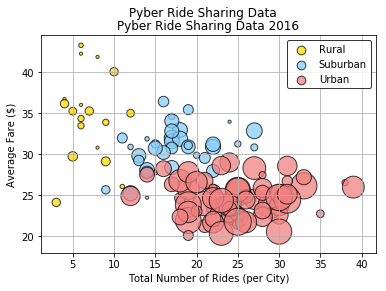

In [6]:
city_group = combined_data.groupby('city')

drivers = city_group.mean()['driver_count']
rides = city_group['ride_id'].count()
avg_fare = city_group.mean()['fare']

citytype = city_df.set_index('city')['type']

city_table = pd.DataFrame({"Type of City": citytype,
                           "Average Fare": avg_fare,
                           "Total Drivers": drivers,
                           "# of Rides": rides
})

rural = city_table[city_table['Type of City'] == 'Rural']
suburban = city_table[city_table['Type of City'] == 'Suburban']
urban = city_table[city_table['Type of City'] == 'Urban']

plt.suptitle('Pyber Ride Sharing Data')


city_color = {'Urban': 'lightcoral', 'Suburban': 'lightskyblue', 'Rural': 'gold'}

plt.scatter(rural['# of Rides'], rural['Average Fare'], s = rural['Total Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['# of Rides'], suburban['Average Fare'], s = suburban['Total Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['# of Rides'], urban['Average Fare'], s = urban['Total Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

leg = plt.legend(frameon = True, edgecolor = 'black')
leg.legendHandles[0]._sizes = [75]
leg.legendHandles[1]._sizes = [75]
leg.legendHandles[2]._sizes = [75]



plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

plt.grid()

## Total Fares by City Type

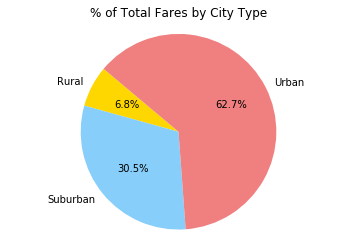

In [9]:
# Calculate Type Percents
#group by type to be used by all pie charts
city_type = combined_data.groupby('type')

#total fare by city
total_fare = city_type.sum()['fare']

#pie chart build
labels = total_fare.index
colors = ["gold", "lightskyblue", "lightcoral"]

#colors and exploe the same for all pie charts, reference here
explode = [0 , 0, .3]
plt.pie(total_fare, startangle = 140, labels = labels, colors = colors, autopct = "%1.1f%%")

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

# Build Pie Chart

# Save Figure


## Total Rides by City Type

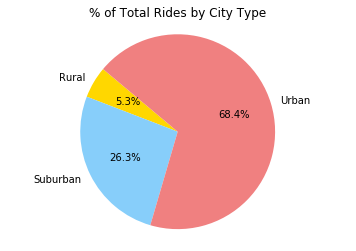

In [10]:
# Calculate Ride Percents
#group by type to be used by all pie charts
#city_type = combined_data.groupby('type')

#total fare by city
total_rides = city_type.count()['ride_id']

#pie chart build
labels = total_rides.index

#colors and exploe the same for all pie charts, reference here
explode = [0 , 0, .3]
plt.pie(total_rides, startangle = 140, colors = colors, labels = labels, autopct = "%1.1f%%")

#pie chart display
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()



# Build Pie Chart

# Save Figure


## Total Drivers by City Type

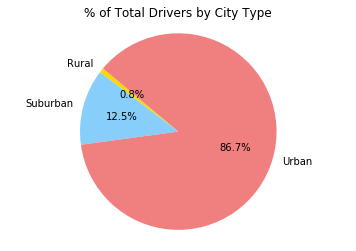

In [11]:
# Calculate Driver Percents
#total fare by city
total_drivers = city_type.sum()['driver_count']

#pie chart build
labels = total_drivers.index

#colors and exploe the same for all pie charts, reference here
explode = [0 , 0, .3]
plt.pie(total_drivers, startangle = 140, labels = labels, colors = colors, autopct = "%1.1f%%")

#pie chart display
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()



# Build Pie Charts

# Save Figure
